In [1]:
# Dependencies and Setup
# import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import matplotlib.pyplot as plt
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import plotly.graph_objects as go


# Import API key
from api_key import g_key

In [2]:
#Call 2021 Property house sales stats
Stats_21 = pd.read_csv('Resources/yearly_data_clean_2021.csv',encoding='cp1252')
Stats_21.head()

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,1220000.0,75.0,2810000.0,735000.0,863000.0,1025000.0,1445000.0,...,1200000.0,89.0,2625000.0,499000.0,49.0,32.0,610.0,204.0,1300.0,320.0
1,3040,Aberfeldie,647,1360000.0,223.0,4000000.0,283000.0,545000.0,1000000.0,1811000.0,...,1250000.0,295.0,7000000.0,280000.0,147.0,92.0,495.0,419.0,1250.0,230.0
2,3042,Airport West,757,1050000.0,99.0,2870000.0,600000.0,710000.0,849000.0,1265000.0,...,965000.0,115.0,2900000.0,590000.0,65.0,40.0,500.0,135.0,1100.0,280.0
3,3021,Albanvale,787,613000.0,336.0,1550000.0,330000.0,450000.0,555000.0,685000.0,...,599000.0,506.0,1460000.0,55000.0,91.0,43.0,350.0,655.0,1593.0,170.0
4,3206,Albert Park,797,2680000.0,49.0,8600000.0,1235000.0,1525000.0,2250000.0,3575000.0,...,2600000.0,65.0,9750000.0,1300000.0,35.0,19.0,800.0,99.0,1900.0,330.0


In [5]:
#Call school data from school list csv file
school_data = pd.read_csv('Resources/school list 2021.csv',encoding='cp1252')
school_data.head()

,Education_Sector,Entity_Type,SCHOOL_NO,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675


In [6]:
# trim the shool dataframe and rename the columns
school_reduced=school_data[["Education_Sector","SCHOOL_NO","School_Name","School_Type","Address_Line_1","Address_Town","Address_Postcode","X","Y"]]
school_renamed=school_reduced.rename(columns={"Education_Sector":"Education sector",
                                     "SCHOOL_NO":"School number",
                                     "School_Name":"Name",
                                     "School_Type":"Type",
                                     "Address_Line_1":"Address",
                                     "Address_Town":"Town/city",
                                     "Address_Postcode":"Postcode",
                                     "X":"Longitude",
                                     "Y":"Latitude",})
school_renamed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education sector  2291 non-null   object 
 1   School number     2291 non-null   int64  
 2   Name              2291 non-null   object 
 3   Type              2291 non-null   object 
 4   Address           2291 non-null   object 
 5   Town/city         2291 non-null   object 
 6   Postcode          2291 non-null   int64  
 7   Longitude         2291 non-null   float64
 8   Latitude          2291 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 161.2+ KB


In [ ]:
school_renamed["School number"].nunique()

In [ ]:
len(school_renamed["Postcode"].unique())

In [85]:
#merge shool list with 2021 Sales data, trim down the data, drop any NAN data
combined=pd.merge(school_renamed,Stats_21,how="right",on="Postcode")
combined_trim=combined[["Education sector","School number","Name","Postcode","Town/city","Longitude","Latitude","medianSoldPrice","numberSold"]]
combined_trim=combined_trim.dropna(how='any')
combined_clean=combined_trim.drop_duplicates(subset='Name', keep="first")
combined_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 2307
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education sector  995 non-null    object 
 1   School number     995 non-null    float64
 2   Name              995 non-null    object 
 3   Postcode          995 non-null    int64  
 4   Town/city         995 non-null    object 
 5   Longitude         995 non-null    float64
 6   Latitude          995 non-null    float64
 7   medianSoldPrice   995 non-null    float64
 8   numberSold        995 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 77.7+ KB


In [86]:
combined_clean.to_csv('Resources/combined_df.csv',encoding='utf-8',index=False,header=True)

In [87]:
# groupby the combined df by postcodes, calculate how many shools under each postcode
groupby_df=combined_clean.groupby(['Postcode'])
school_count=groupby_df["Postcode"].count()
school_count_df=pd.DataFrame(school_count)
school_count_df=school_count_df.rename(columns={"Postcode":"School count"})
school_count_df2=school_count_df.reset_index()
school_count_df2

,Postcode,School count
0,3003,1
1,3008,1
2,3011,6
3,3012,2
4,3013,4
...,...,...
165,3939,5
166,3941,2
167,3943,1
168,3976,5


In [88]:
# merge the two df together based on postcode
school_complete=pd.merge(school_count_df2,combined_clean,how="outer",on="Postcode")
school_complete=school_complete.dropna(how='any')
school_complete_df=school_complete.drop_duplicates(subset='School number', keep="first")
school_complete.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 994
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Postcode          995 non-null    int64  
 1   School count      995 non-null    int64  
 2   Education sector  995 non-null    object 
 3   School number     995 non-null    float64
 4   Name              995 non-null    object 
 5   Town/city         995 non-null    object 
 6   Longitude         995 non-null    float64
 7   Latitude          995 non-null    float64
 8   medianSoldPrice   995 non-null    float64
 9   numberSold        995 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 85.5+ KB


In [89]:
# save the rename shool data frame to csv file
school_complete.to_csv('Resources/school list clean.csv',encoding='utf-8',index=False,header=True)

In [90]:
# Set a dataframe for top 10 private and public shools.
# srouce from: https://bettereducation.com.au/results/vcePublicSchoolResults.aspx
# only schools with the postcode has sales number will be listed
Top_lists = ['5','385','391','554','1021','1258','1267','1322','2009','2019','7384','7550','7635','8025','8125','8135','8819','8856','8865','8866']
Top_schools= school_complete[school_complete['School number'].isin(Top_lists)]
Top_schools_df=Top_schools.drop_duplicates(subset='Name', keep="first")
Top_schools_df.info(30)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 111 to 850
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Postcode          16 non-null     int64  
 1   School count      16 non-null     int64  
 2   Education sector  16 non-null     object 
 3   School number     16 non-null     float64
 4   Name              16 non-null     object 
 5   Town/city         16 non-null     object 
 6   Longitude         16 non-null     float64
 7   Latitude          16 non-null     float64
 8   medianSoldPrice   16 non-null     float64
 9   numberSold        16 non-null     float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.4+ KB


In [91]:
# Set a dataframe to include the rest of the schools.
School_not_top=school_complete.drop(school_complete[school_complete['School number'].isin(['5','385','391','554','1021','1258','1267','1322','2009','2019','7384','7550','7635','8025','8125','8135','8819','8856','8865','8866'])].index)
School_not_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 0 to 994
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Postcode          979 non-null    int64  
 1   School count      979 non-null    int64  
 2   Education sector  979 non-null    object 
 3   School number     979 non-null    float64
 4   Name              979 non-null    object 
 5   Town/city         979 non-null    object 
 6   Longitude         979 non-null    float64
 7   Latitude          979 non-null    float64
 8   medianSoldPrice   979 non-null    float64
 9   numberSold        979 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 84.1+ KB


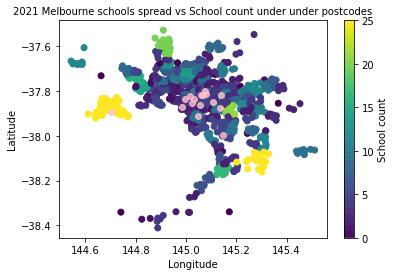

In [73]:
#plot top lists schools and the rest of schools 
plt.scatter(School_not_top['Longitude'], School_not_top['Latitude'], c=School_not_top['School count'],alpha=2.5)
plt.scatter(Top_schools_df['Longitude'], Top_schools_df['Latitude'], color="pink",alpha=0.8)
clb = plt.colorbar()
clb.ax.set_yticklabels(range(0,30,5))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("School count")
plt.title('2021 Melbourne schools spread vs School count under under postcodes',size=10)
plt.savefig("Output/2021 2021 Melbourne schools spread vs School count under under postcodes.png") 

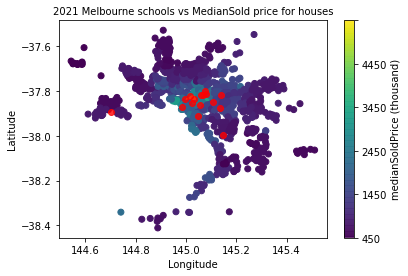

In [92]:
#plot top lists schools and the rest of schools 
plt.scatter(School_not_top['Longitude'], School_not_top['Latitude'], c=School_not_top['medianSoldPrice'],alpha=2.5)
plt.scatter(Top_schools_df['Longitude'], Top_schools_df['Latitude'], color="red",alpha=0.8)
clb = plt.colorbar()
clb.ax.set_yticklabels(range(450,4550, 1000))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("medianSoldPrice (thousand)")
plt.title('2021 Melbourne schools vs MedianSold price for houses',size=10)
plt.savefig("Output/2021 Melbourne schools vs MedianSold price for houses.png") 

In [95]:
#Configure gmaps
gmaps.configure(api_key=g_key)

In [96]:
# Store latitude and longitude in locations
locations = school_complete[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
medianSoldPrice = school_complete["medianSoldPrice"]

In [97]:
# Plot Heatmap
fig = gmaps.figure(center=(-37.787746,144.883372), zoom_level=8.5)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=medianSoldPrice, 
                                max_intensity=5000000,
                                 dissipating=True,
                                 point_radius=15,)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
school_complete.info()

In [ ]:
#save complate dataframe to csv
school_complete.to_csv('Resources/school_complete_list.csv',encoding='utf-8',index=False,header=True)

In [123]:
top_sales_region=school_complete.sort_values(by=['numberSold']).head(20).copy()

top_sales_region.head()

,Postcode,School count,Education sector,School number,Name,Town/city,Longitude,Latitude,medianSoldPrice,numberSold
769,3185,3,Independent,1729.0,Sholem Aleichem College,ELSTERNWICK,145.001203,-37.882289,1681000.0,10.0
768,3185,3,Independent,1609.0,Leibler Yavneh College,ELSTERNWICK,145.006626,-37.892871,1681000.0,10.0
767,3185,3,Independent,1515.0,Adass Israel School,ELSTERNWICK,145.008205,-37.883899,1681000.0,10.0
1,3008,1,Government,5573.0,Docklands Primary School,Docklands,144.940553,-37.812714,1278000.0,12.0
696,3168,3,Government,734.0,Clayton North Primary School,Clayton,145.122666,-37.911944,955000.0,14.0


In [124]:
#Set the symbol layer to show top 20 region that has hightest sales number
# Store the DataFrame Row
Suburb_info = [info_box_template.format(**row) for index, row in top_sales_region.iterrows()]
symbol_locations = top_sales_region[['Latitude', 'Longitude']]
fig = gmaps.figure(center=(-37.787746,144.883372), zoom_level=8.5)
symbol_layer=gmaps.symbol_layer(symbol_locations, fill_color='blue', stroke_color='purple', scale=4)

# Add marker layer ontop of heat map
fig.add_layer(symbol_layer)
fig.add_layer(heat_layer)
# Display figure
fig


Figure(layout=FigureLayout(height='420px'))

In [125]:
# set school name to a list
School_names=Top_schools_df['Name'].tolist()
# set the infor box template
info_box_template = """
<dl>
<dt>School Name</dt><dd>{Name}</dd>
<dt>Type</dt><dd>{Education sector}</dd>
</dl>
"""
# Store the DataFrame Row
School_info = [info_box_template.format(**row) for index, row in Top_schools_df.iterrows()]
marker_locations = Top_schools_df[['Latitude', 'Longitude']]
fig = gmaps.figure(center=(-37.787746,144.883372), zoom_level=8.5)
markers = gmaps.marker_layer(marker_locations,
    info_box_content=School_info)

# Add marker layer ontop of heat map

fig.add_layer(markers)
fig.add_layer(symbol_layer)
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))